In [216]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#reading the  data
df_health=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_health.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [217]:
#DATA PROFILING
df_health.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [218]:
arr_index=df_health.isnull().sum().index
for i,j in enumerate(df_health.isnull().sum()):
    print(arr_index[i],j,sep='--')
    

Id--0
MSSubClass--0
MSZoning--0
LotFrontage--259
LotArea--0
Street--0
Alley--1369
LotShape--0
LandContour--0
Utilities--0
LotConfig--0
LandSlope--0
Neighborhood--0
Condition1--0
Condition2--0
BldgType--0
HouseStyle--0
OverallQual--0
OverallCond--0
YearBuilt--0
YearRemodAdd--0
RoofStyle--0
RoofMatl--0
Exterior1st--0
Exterior2nd--0
MasVnrType--872
MasVnrArea--8
ExterQual--0
ExterCond--0
Foundation--0
BsmtQual--37
BsmtCond--37
BsmtExposure--38
BsmtFinType1--37
BsmtFinSF1--0
BsmtFinType2--38
BsmtFinSF2--0
BsmtUnfSF--0
TotalBsmtSF--0
Heating--0
HeatingQC--0
CentralAir--0
Electrical--1
1stFlrSF--0
2ndFlrSF--0
LowQualFinSF--0
GrLivArea--0
BsmtFullBath--0
BsmtHalfBath--0
FullBath--0
HalfBath--0
BedroomAbvGr--0
KitchenAbvGr--0
KitchenQual--0
TotRmsAbvGrd--0
Functional--0
Fireplaces--0
FireplaceQu--690
GarageType--81
GarageYrBlt--81
GarageFinish--81
GarageCars--0
GarageArea--0
GarageQual--81
GarageCond--81
PavedDrive--0
WoodDeckSF--0
OpenPorchSF--0
EnclosedPorch--0
3SsnPorch--0
ScreenPorch--0
Po

In [219]:
null_value_column=dict()
for i,j in enumerate(df_health.isnull().sum()):

    if j>0:
        null_value_column[arr_index[i]]=j
null_value_column

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [220]:
df_health[null_value_column.keys()].info()
for keys in null_value_column:
    if df_health[keys].dtype=='O':
        df_health[keys].fillna(df_health[keys].mode()[0],inplace=True)
    else:
        df_health[keys].fillna(df_health[keys].mean(),inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [221]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [222]:
categorical_data=[]
numerical_data=[]
for col in df_health.columns:
    if df_health[col].dtype=='O':
        categorical_data.append(col)
    else:
        numerical_data.append(col)

In [223]:
df_health['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [224]:
df_health[categorical_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [225]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_data:
    arr=le.fit_transform(df_health[col])
    df_health[col+'_encoding']=arr

In [226]:
encoded_value=[]
for col in df_health.columns:
    if col.endswith('encoding'):
        encoded_value.append(col)
df_health[encoded_value]
        

,MSZoning_encoding,Street_encoding,Alley_encoding,LotShape_encoding,LandContour_encoding,Utilities_encoding,LotConfig_encoding,LandSlope_encoding,Neighborhood_encoding,Condition1_encoding,...,GarageType_encoding,GarageFinish_encoding,GarageQual_encoding,GarageCond_encoding,PavedDrive_encoding,PoolQC_encoding,Fence_encoding,MiscFeature_encoding,SaleType_encoding,SaleCondition_encoding
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4
2,3,1,0,0,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,2,2,2,8,0
4,3,1,0,0,3,0,2,0,15,2,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,1,1,4,4,2,2,2,2,8,4
1456,3,1,0,3,3,0,4,0,14,2,...,1,2,4,4,2,2,2,2,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,1,1,4,4,2,2,0,2,8,4
1458,3,1,0,3,3,0,4,0,12,2,...,1,2,4,4,2,2,2,2,8,4


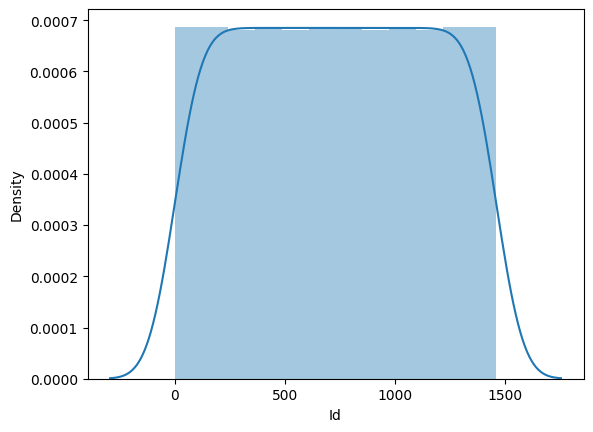

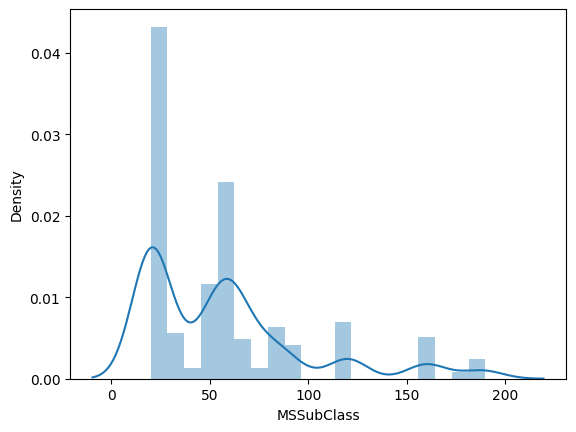

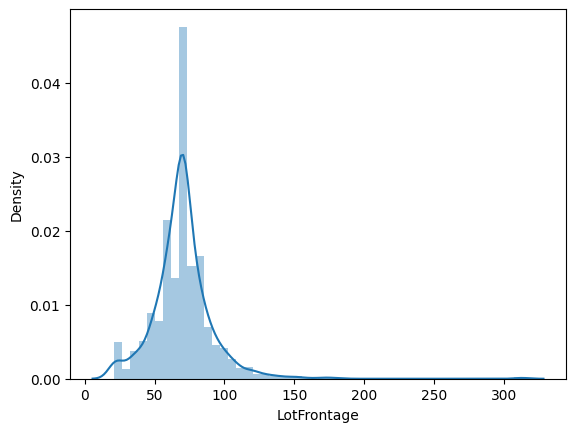

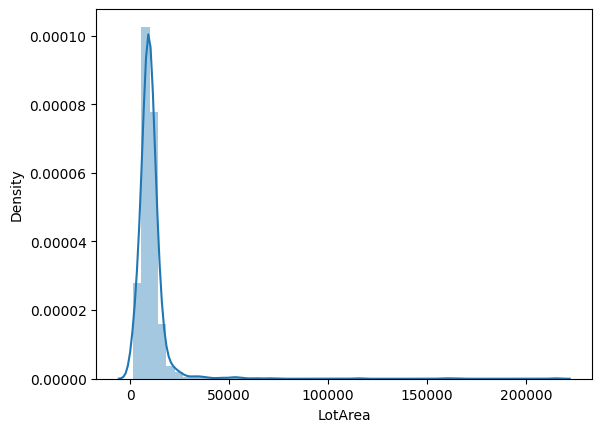

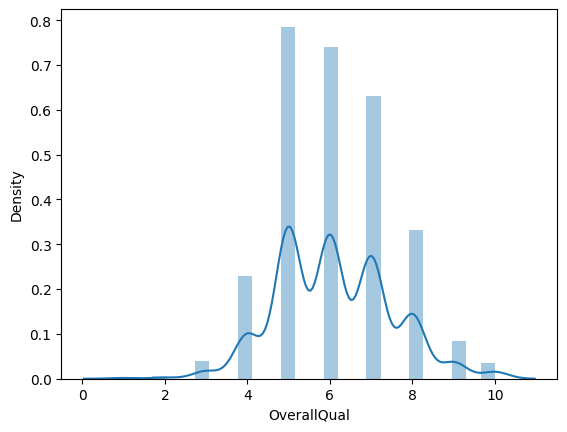

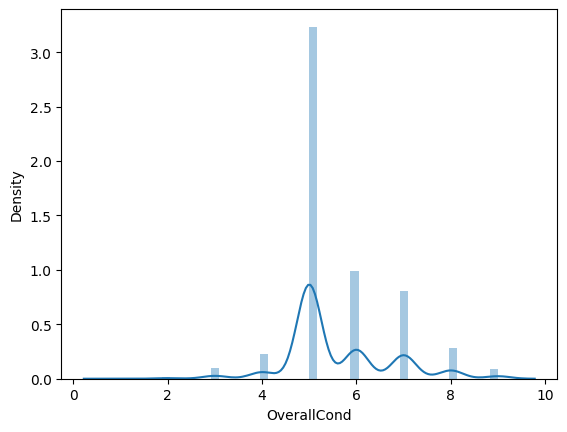

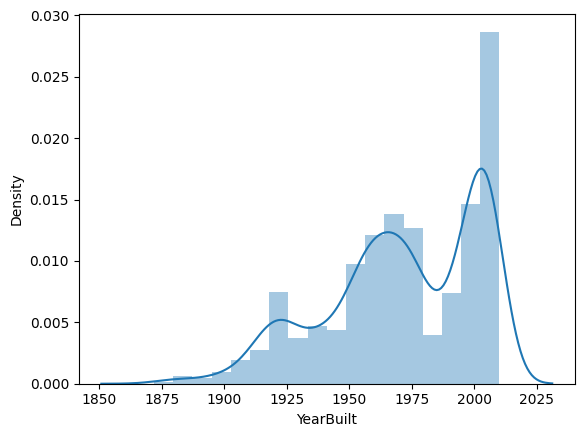

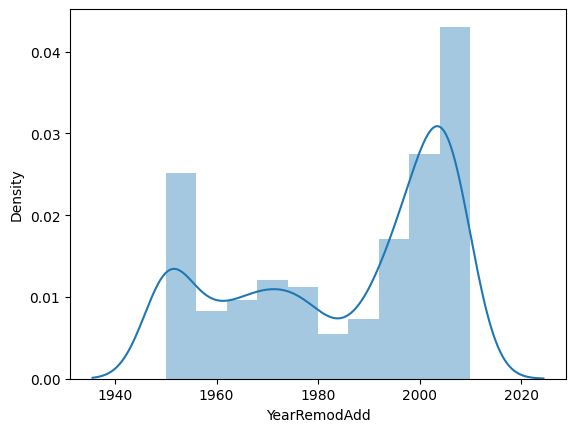

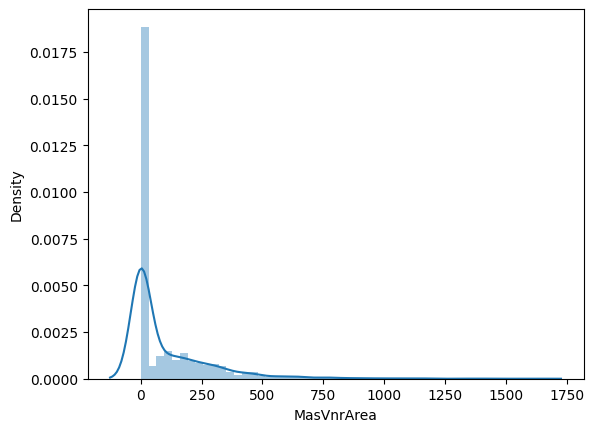

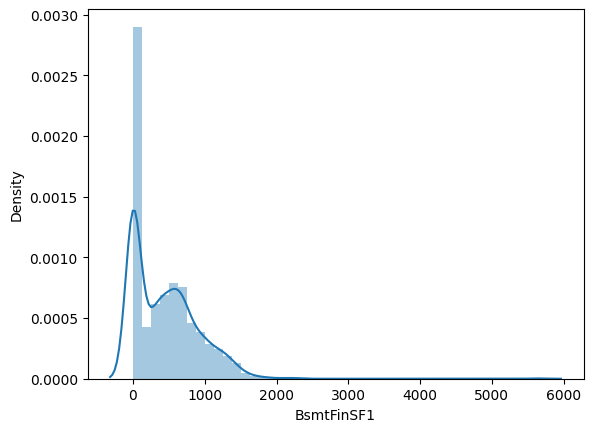

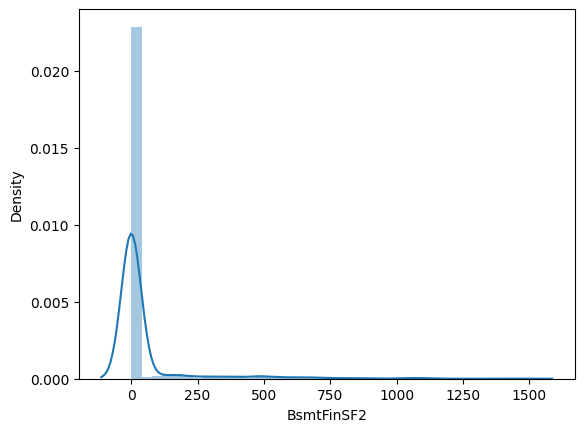

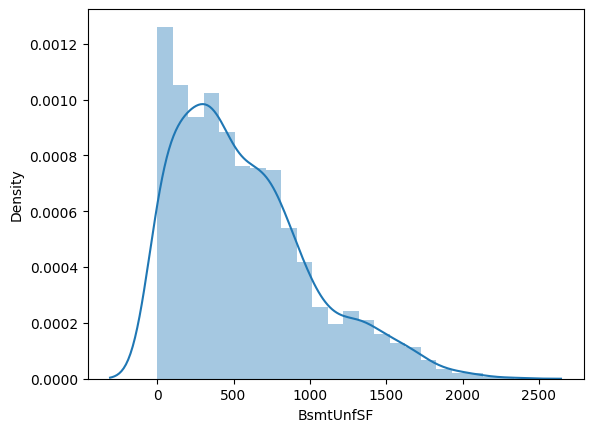

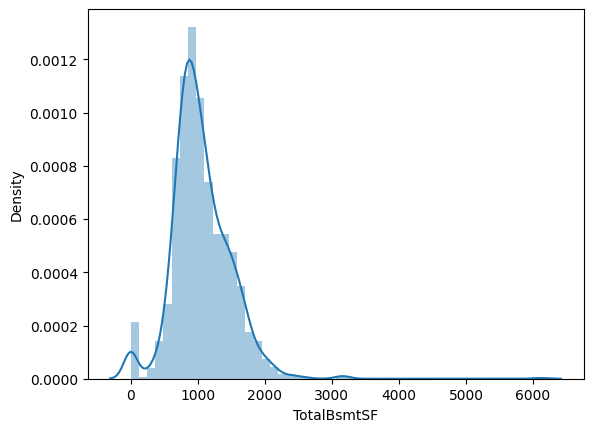

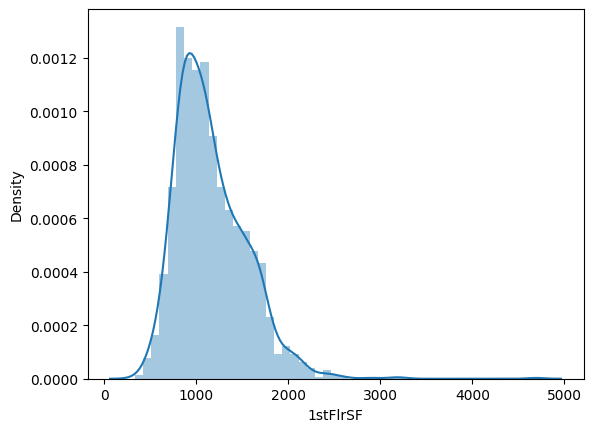

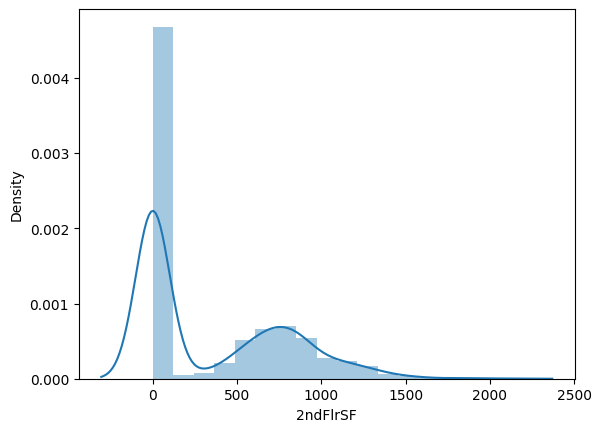

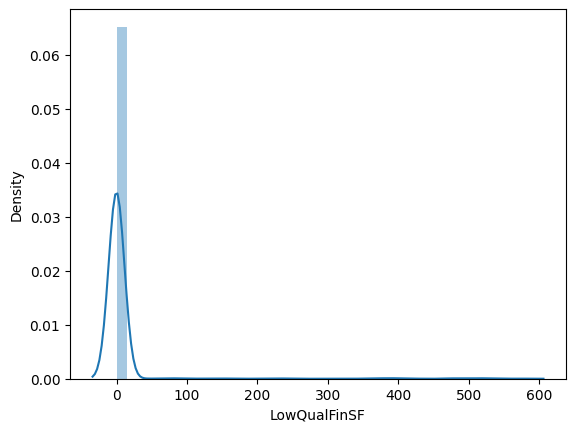

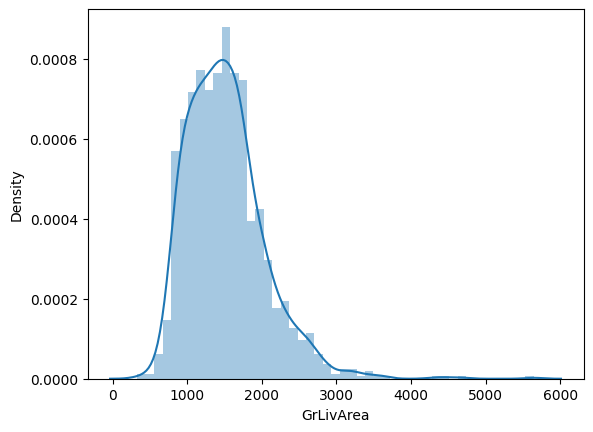

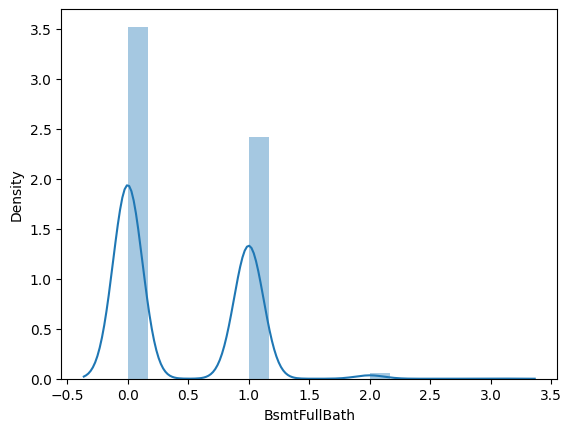

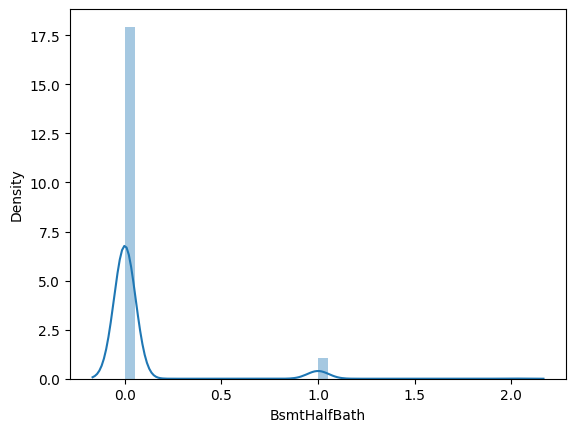

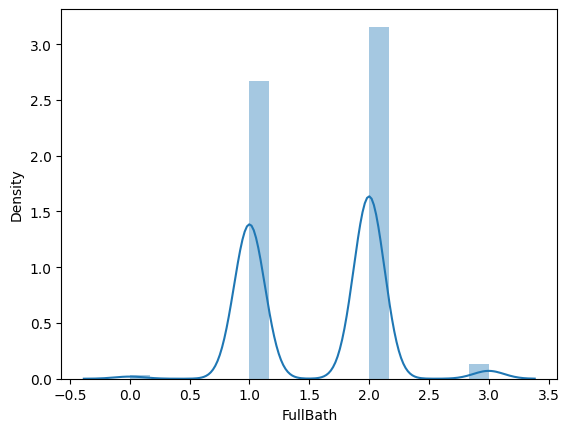

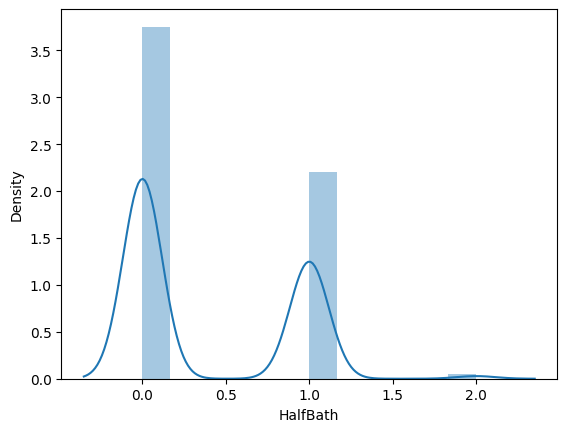

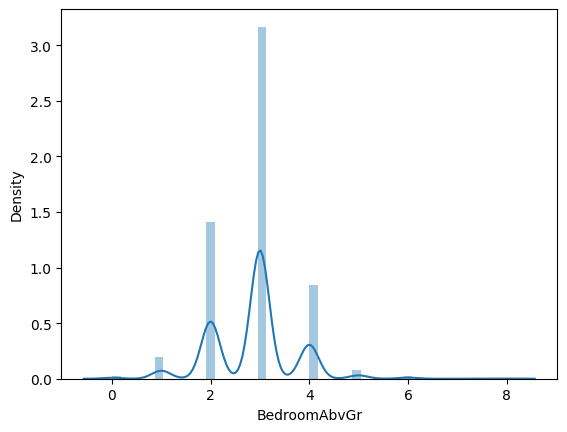

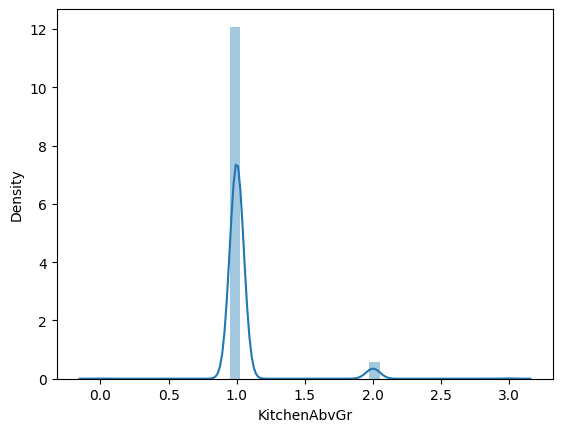

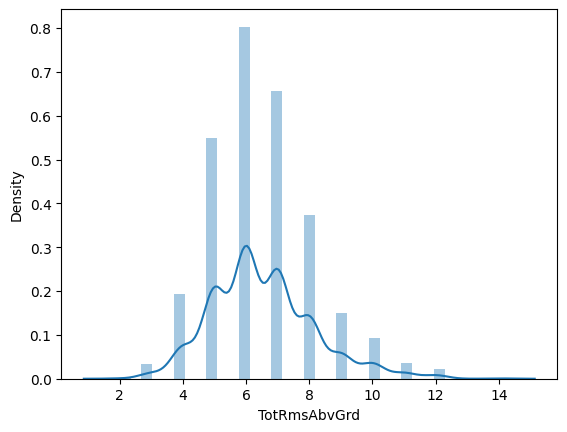

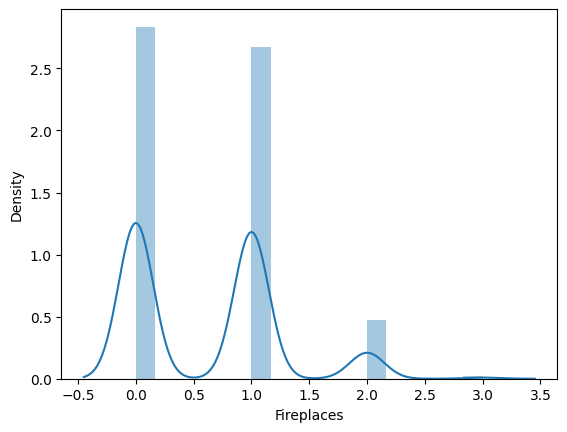

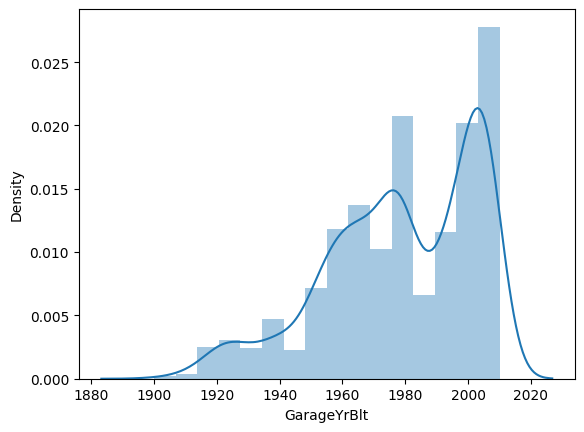

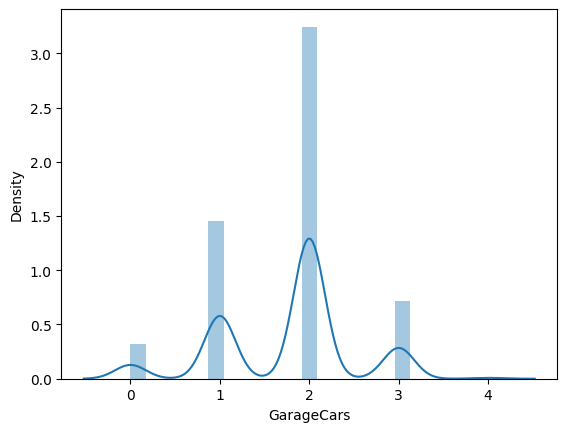

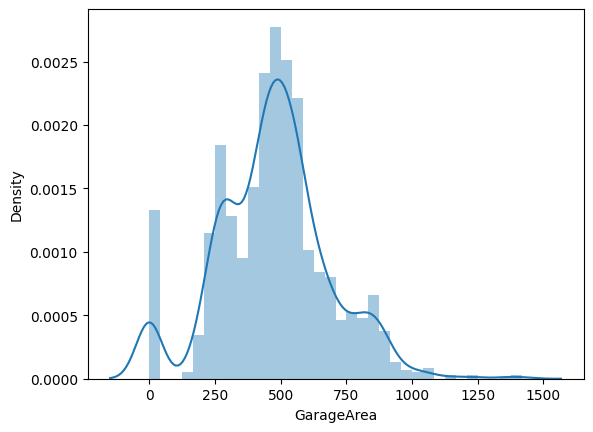

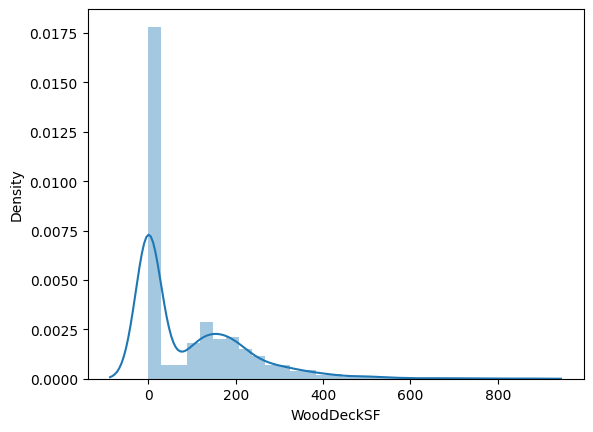

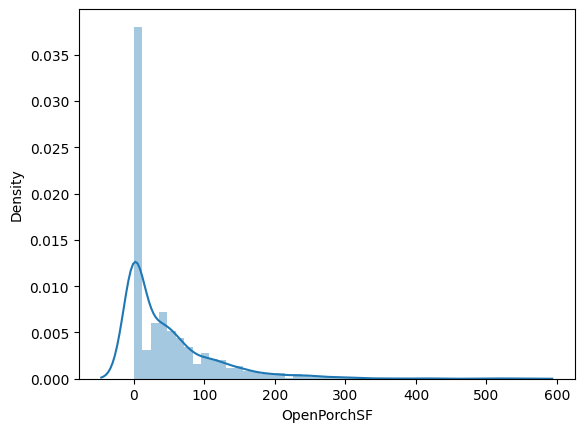

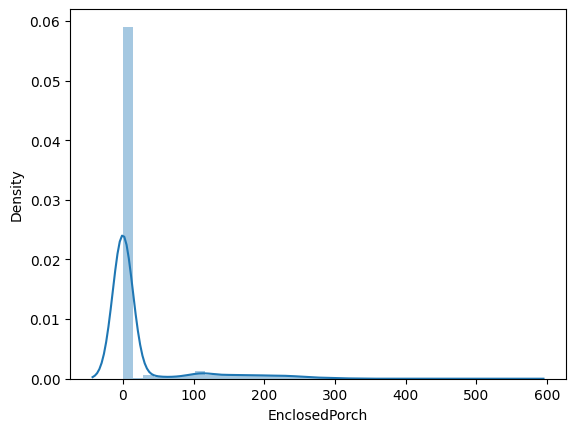

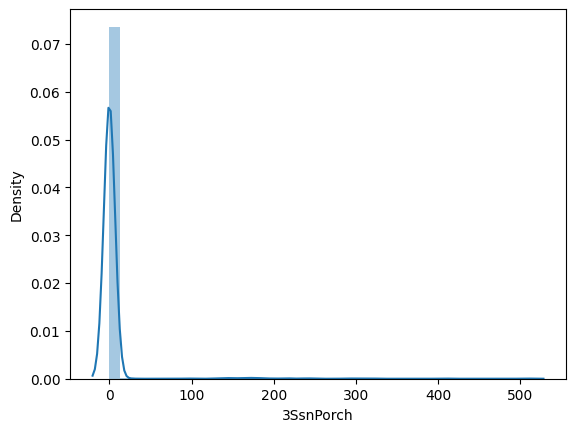

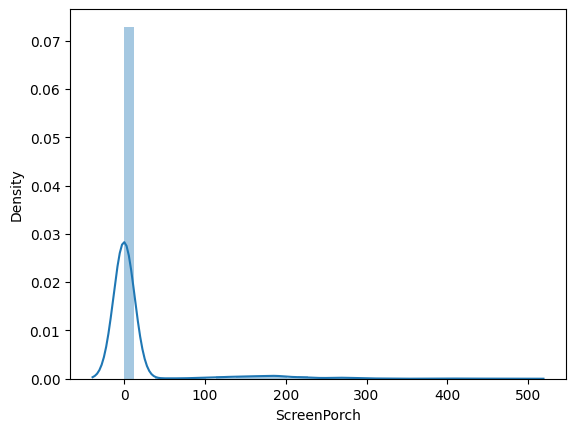

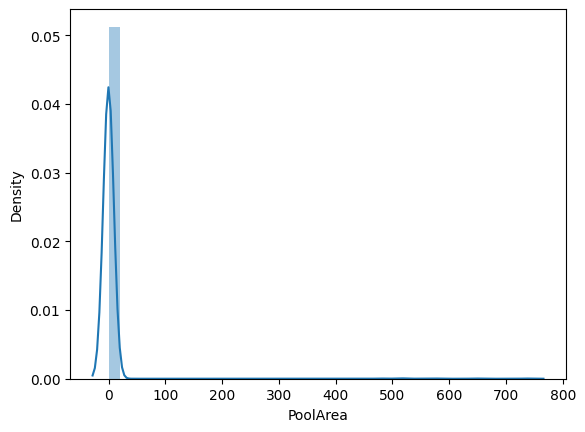

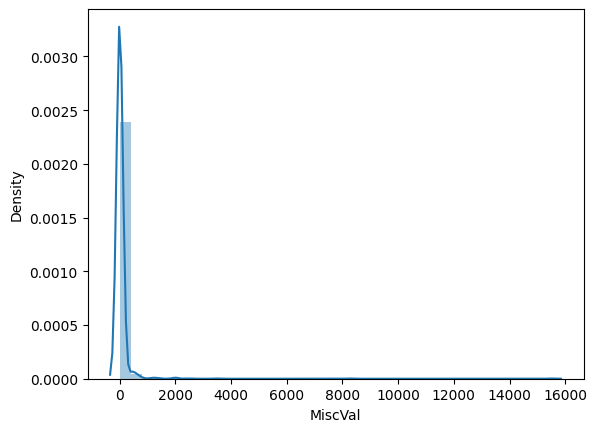

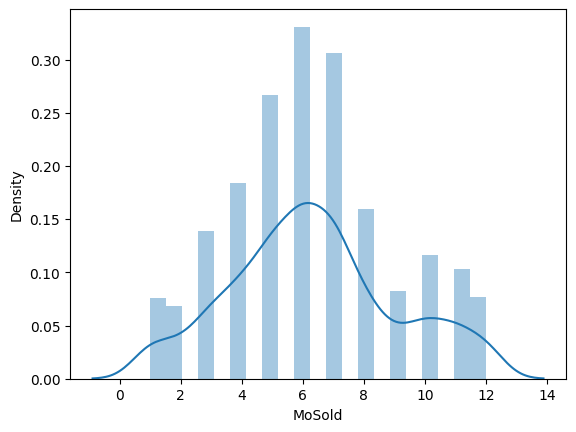

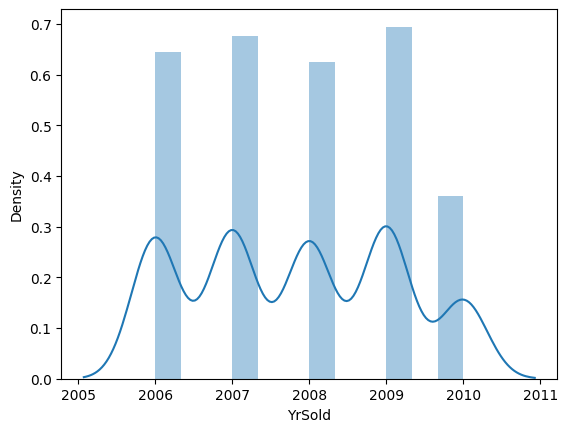

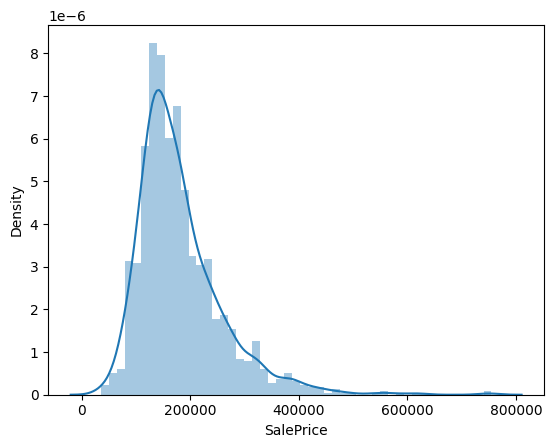

In [227]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_data:
    sns.distplot(df_health[col])
    plt.show()
    

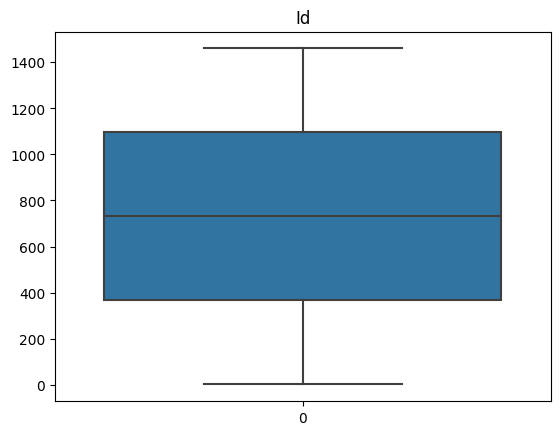

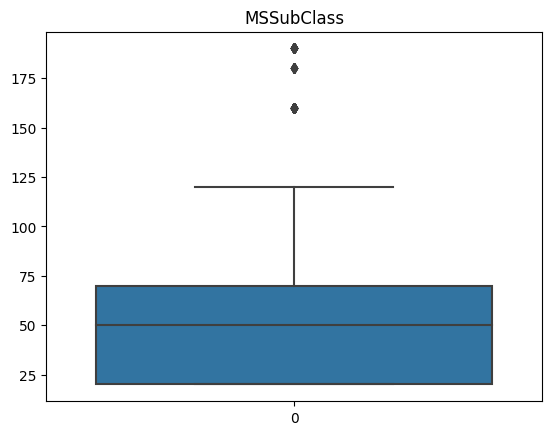

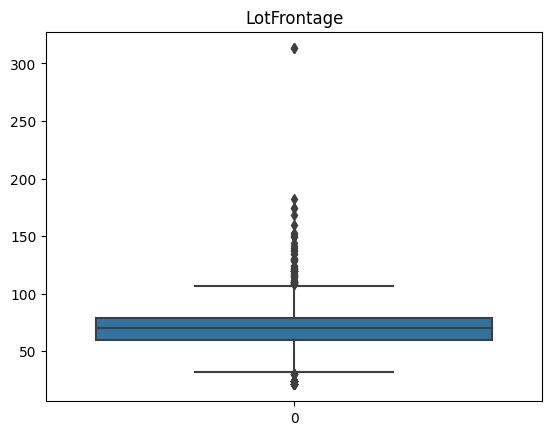

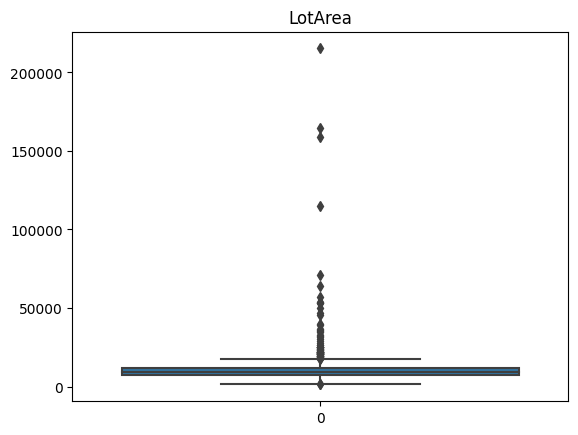

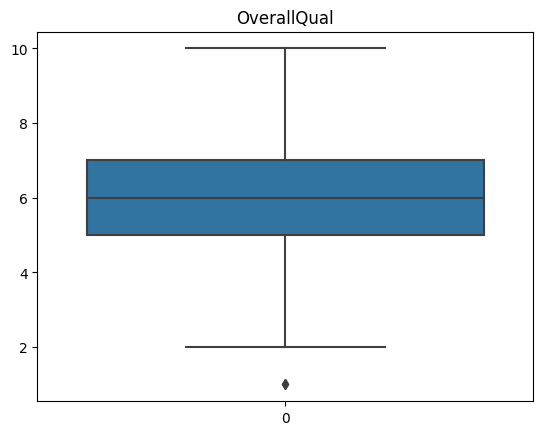

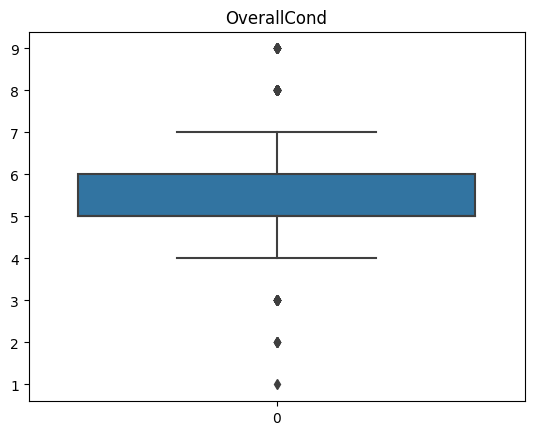

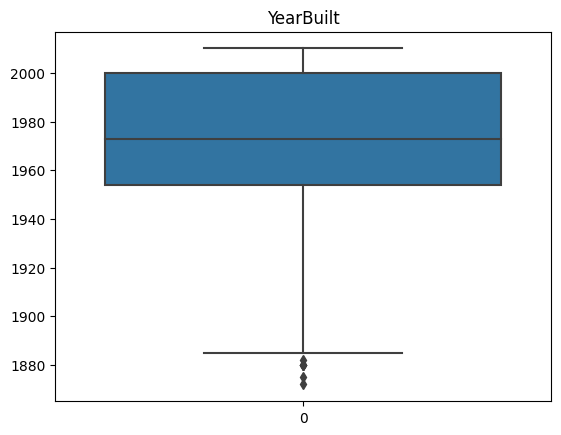

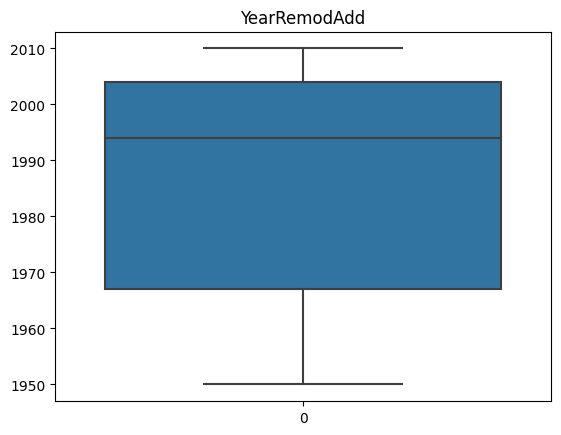

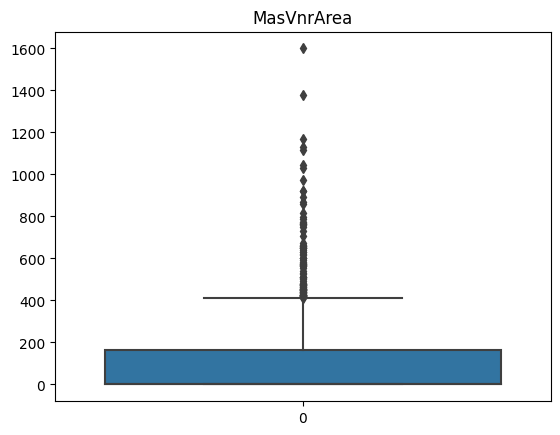

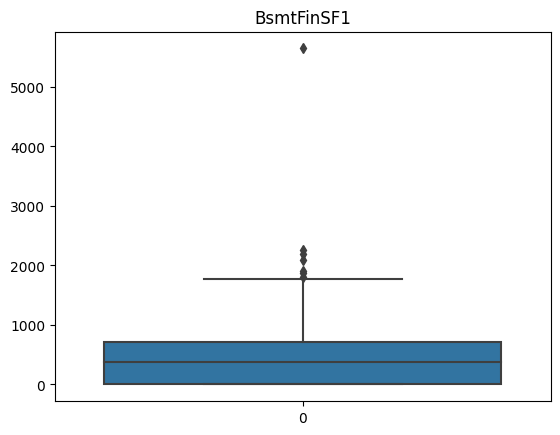

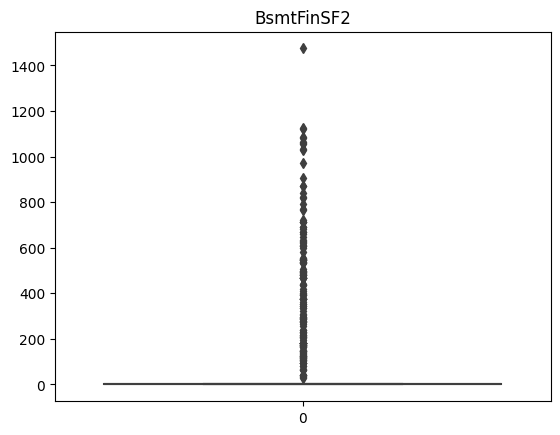

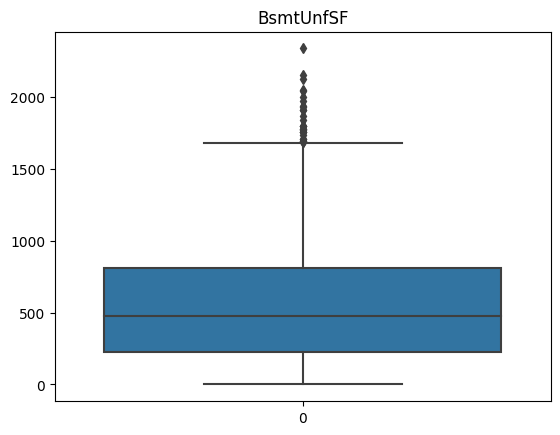

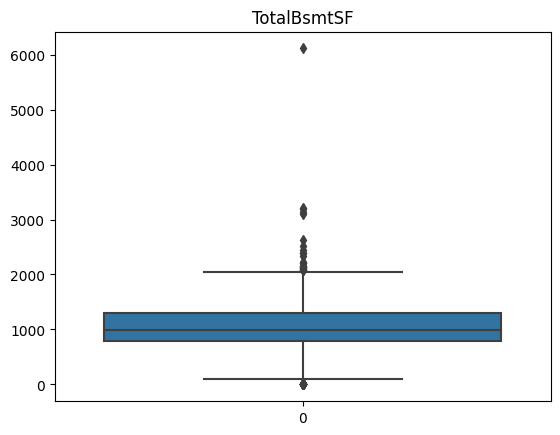

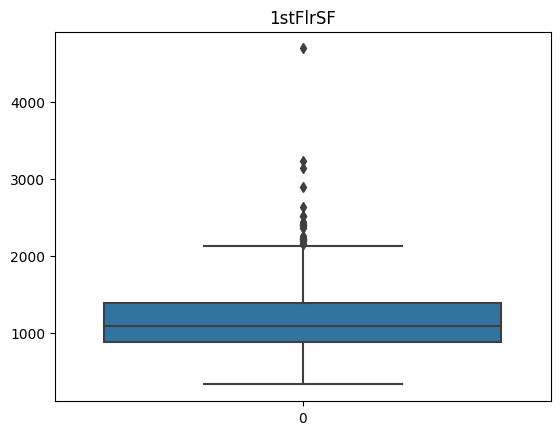

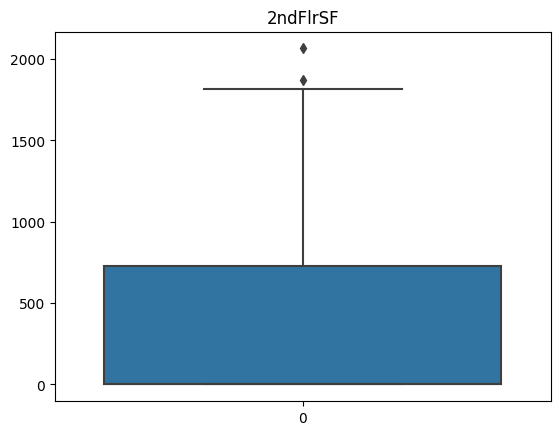

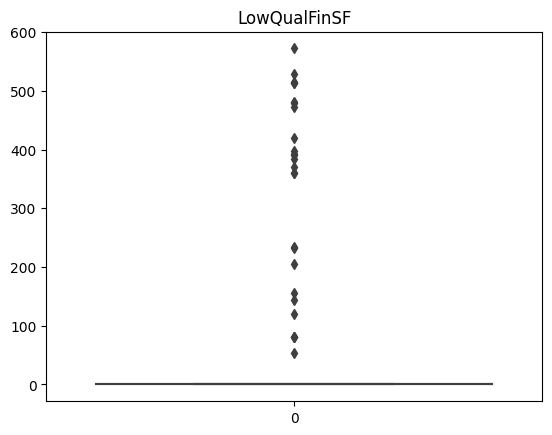

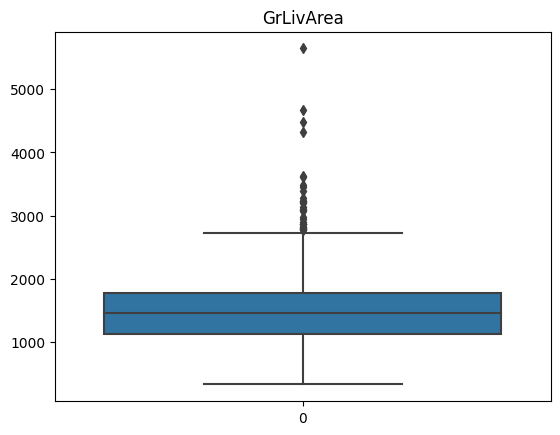

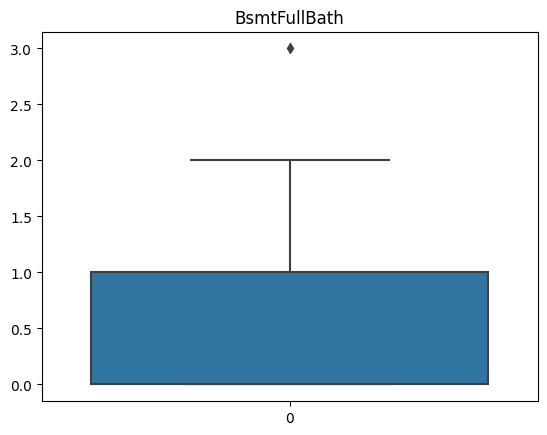

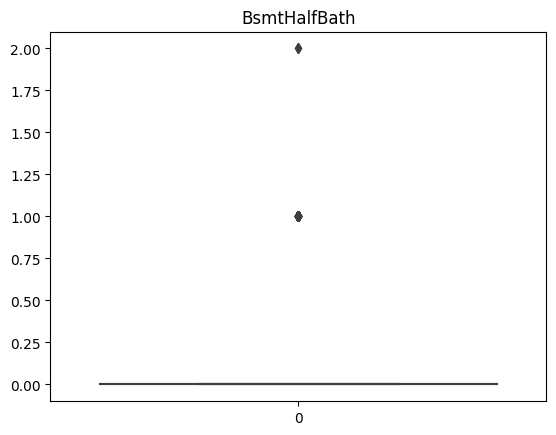

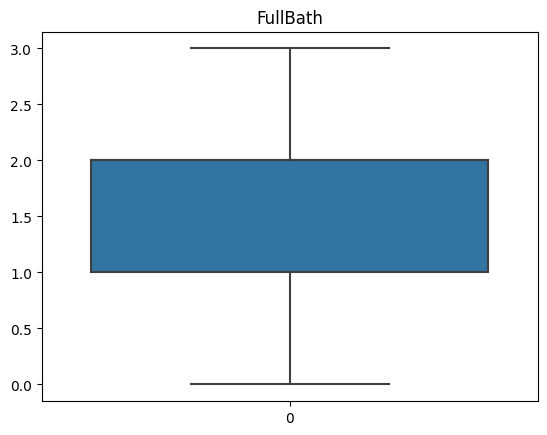

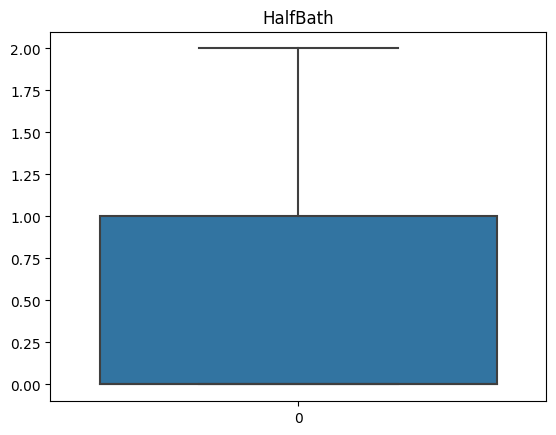

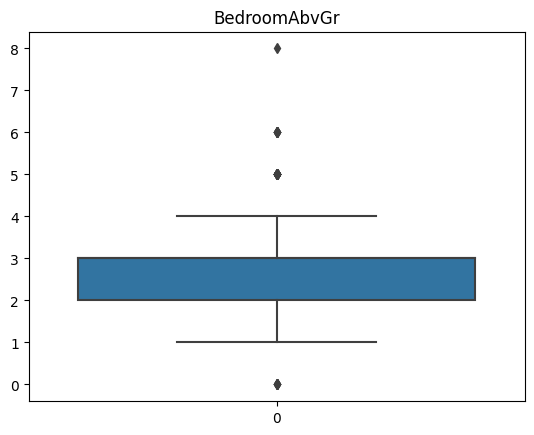

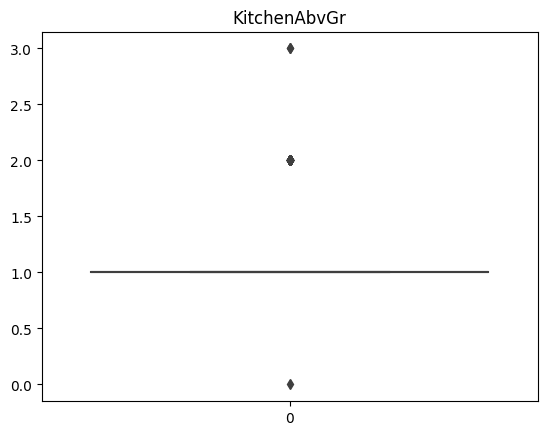

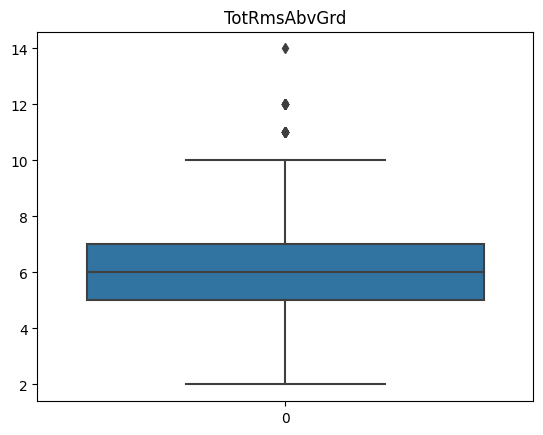

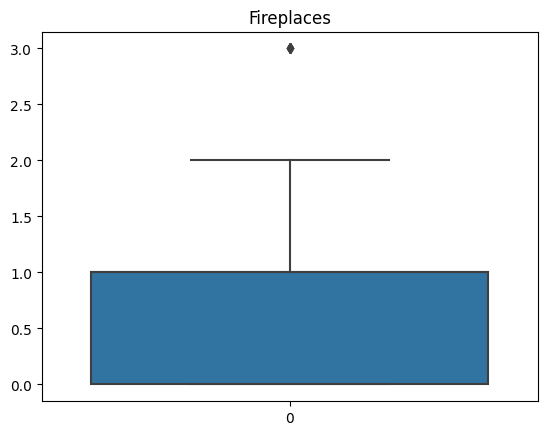

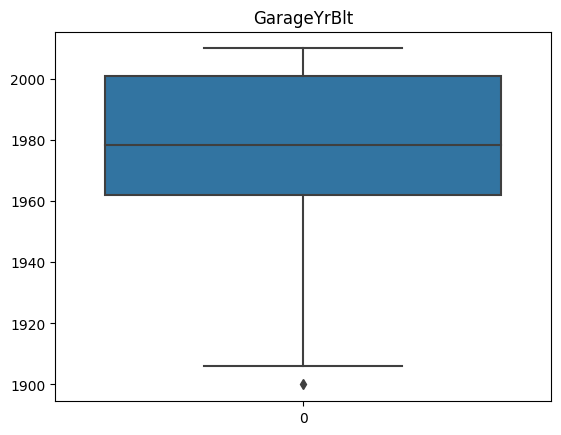

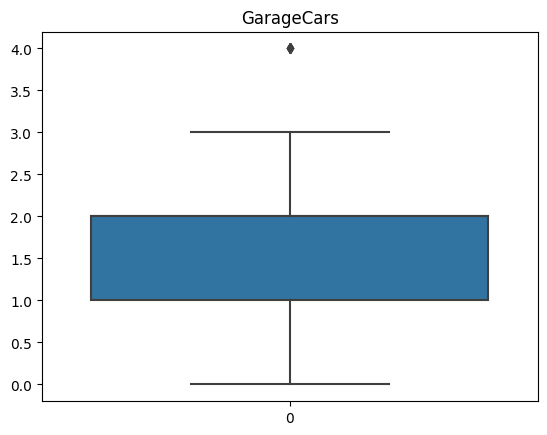

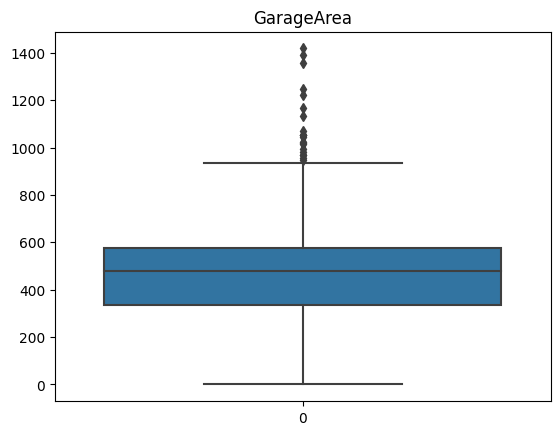

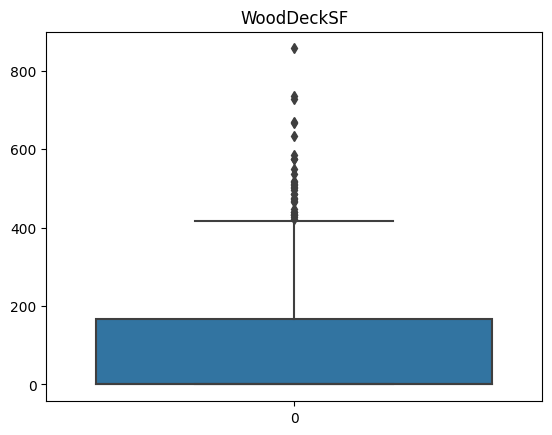

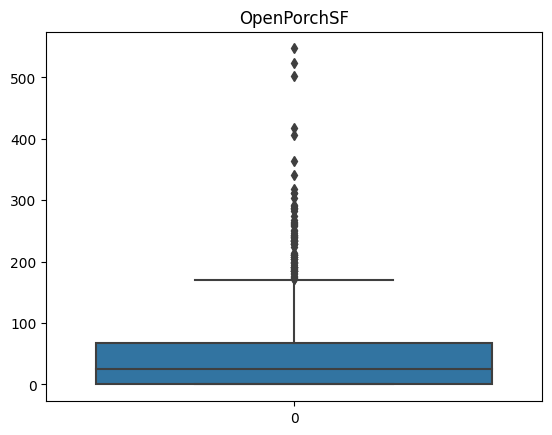

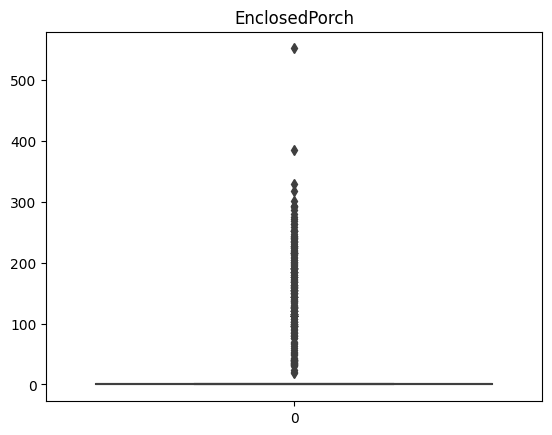

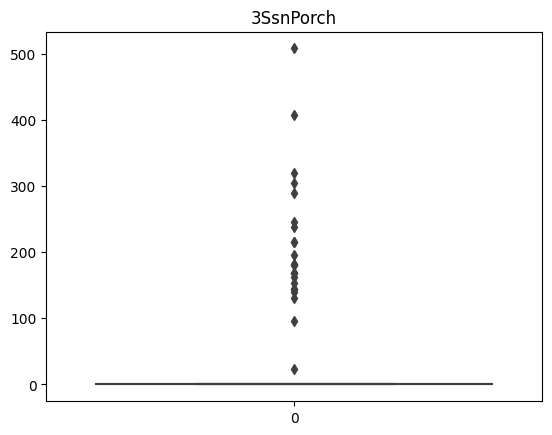

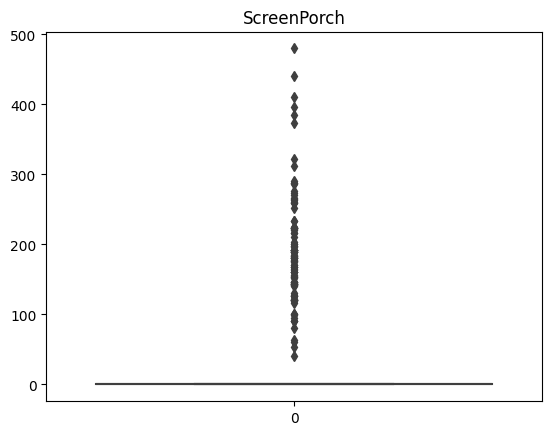

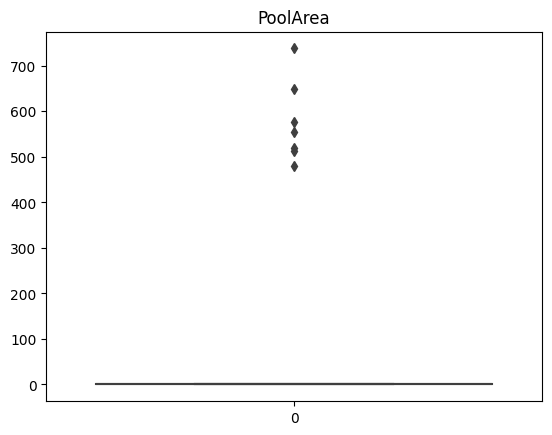

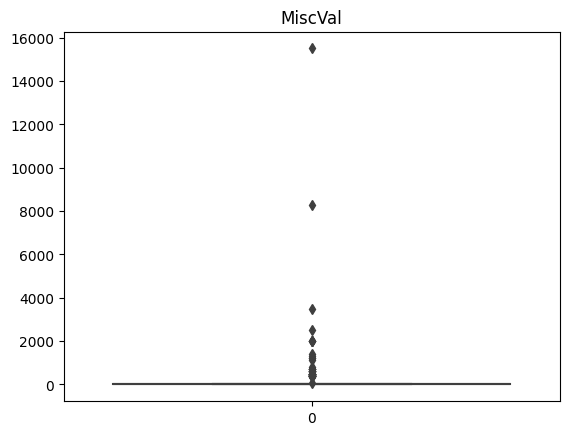

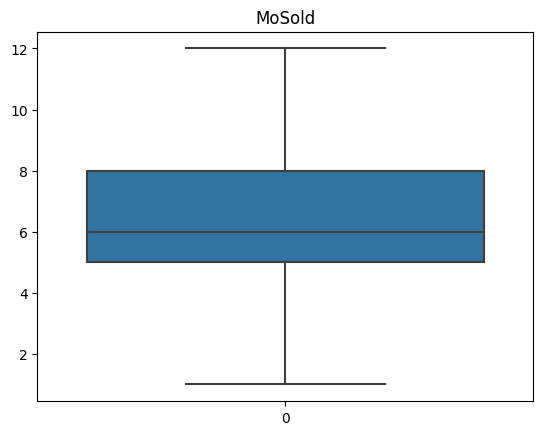

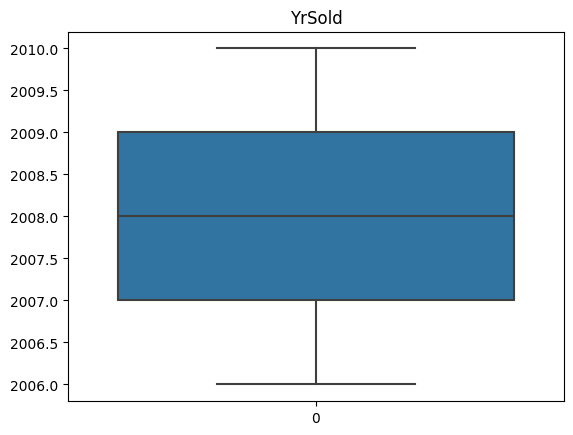

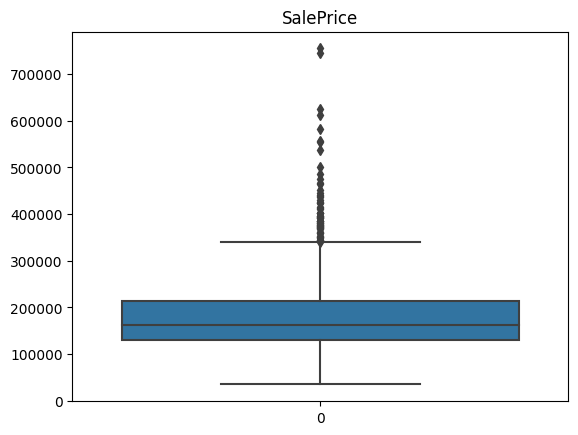

In [228]:

for i,col  in enumerate(numerical_data):
    sns.boxplot(df_health[col])
    plt.title(col)
    plt.show()
    
 

In [229]:
for col in numerical_data:
    q1=np.quantile(df_health[col].values,0.25)
    q3=np.quantile(df_health[col].values,0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+1.5*iqr
    df_health.replace(df_health[(df_health[col]<lb) | (df_health[col]>ub)].index,df_health[col].mean(),inplace=True)
    
    

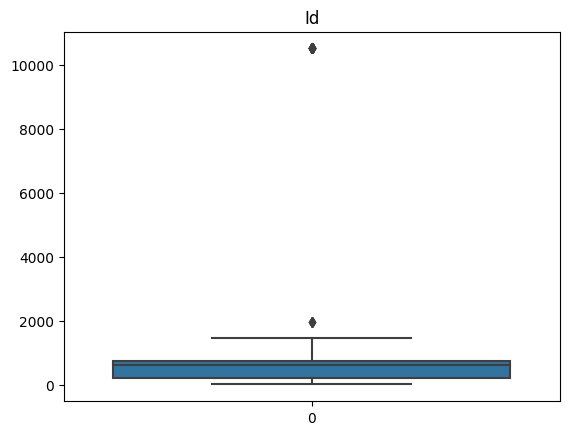

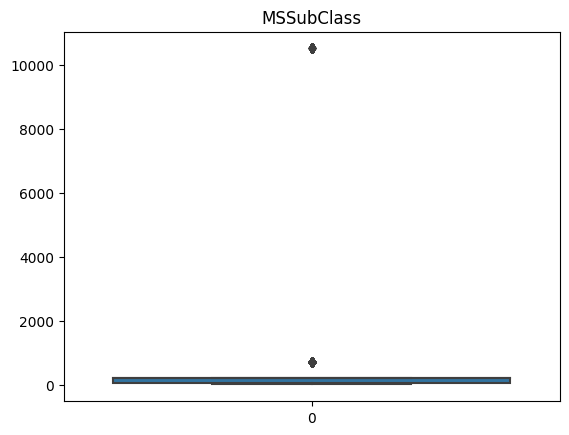

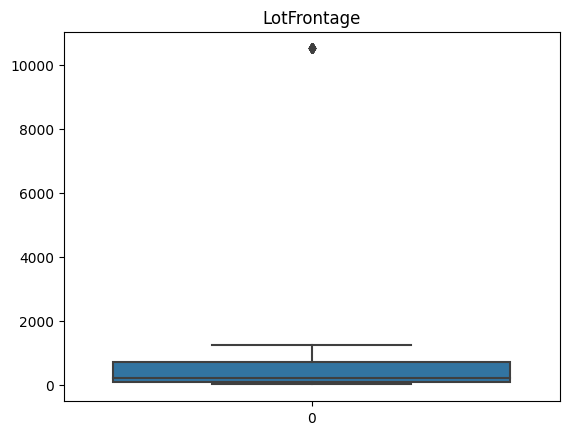

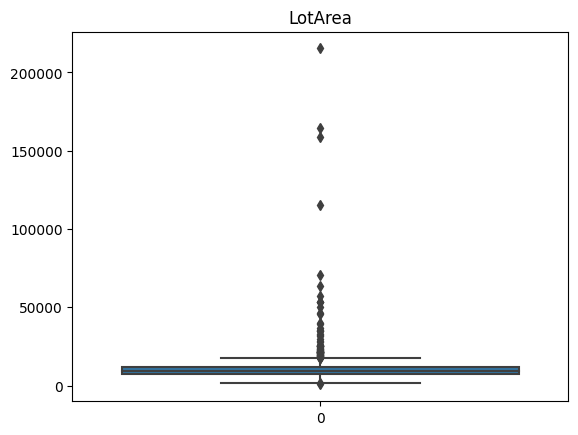

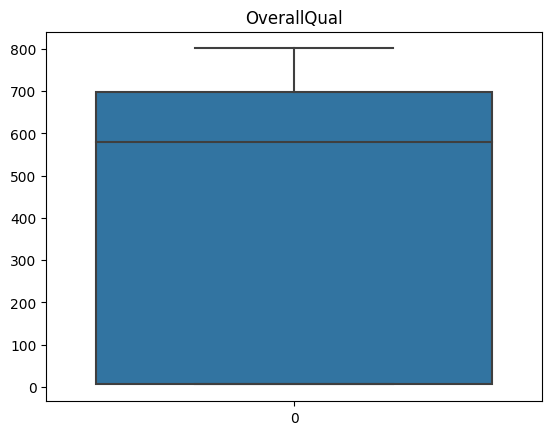

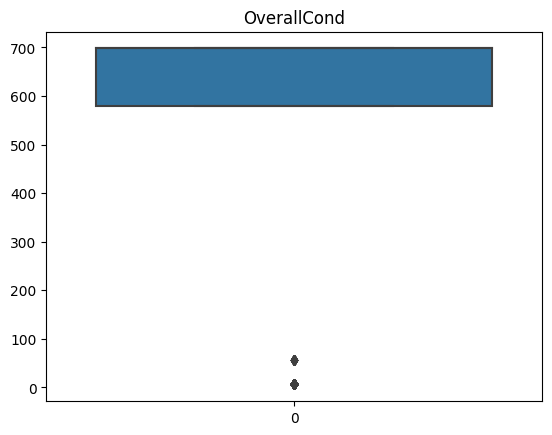

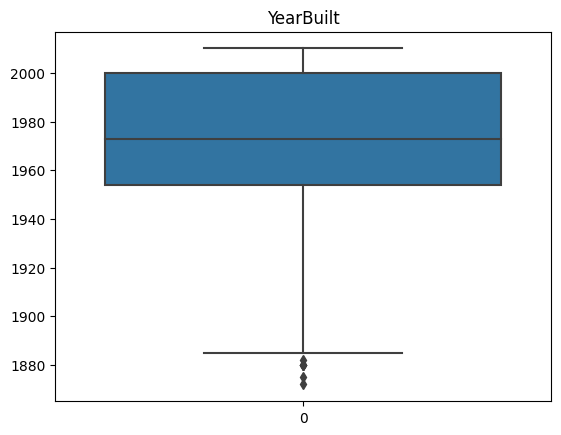

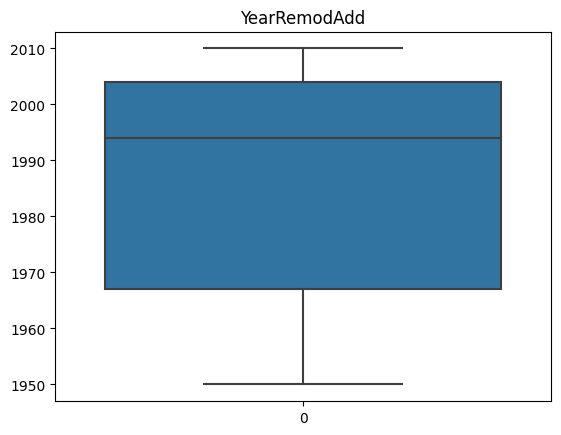

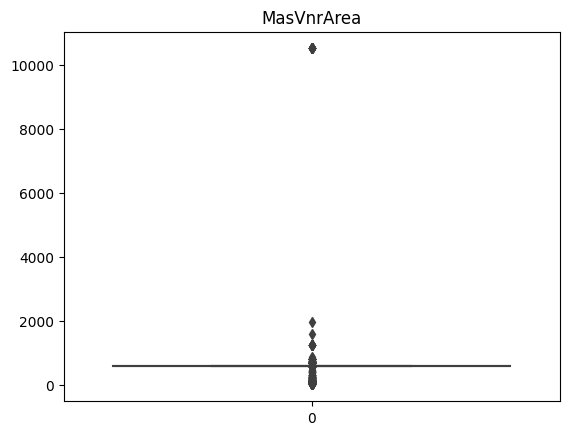

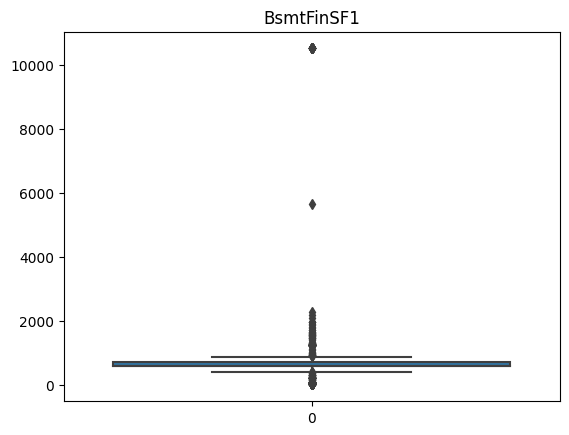

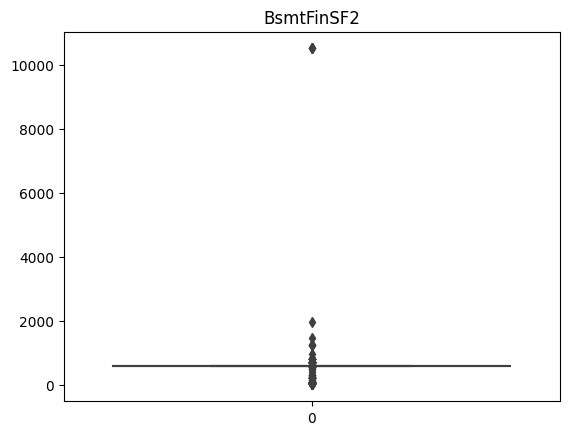

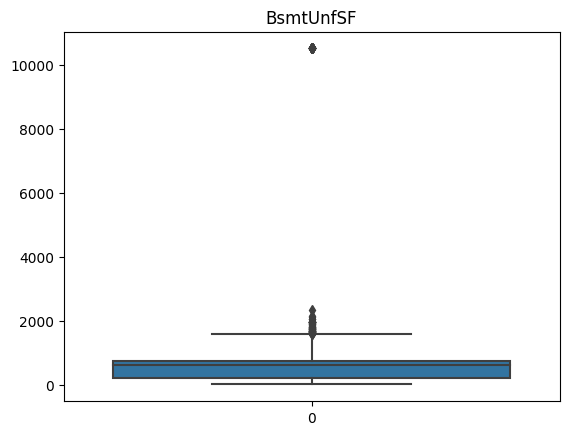

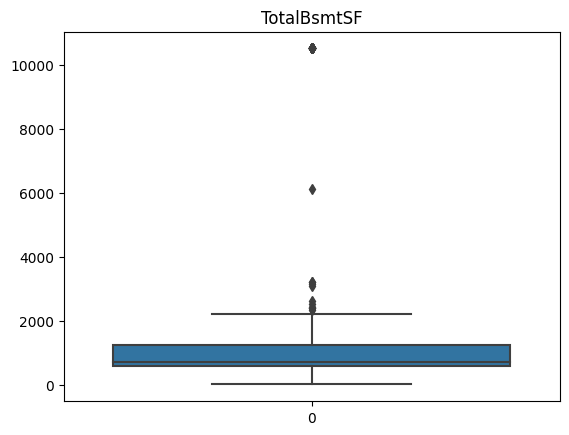

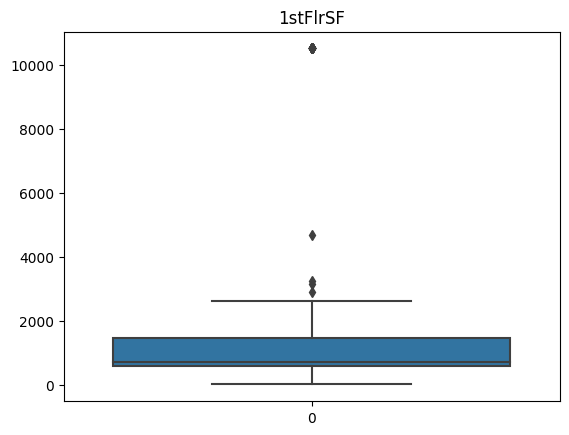

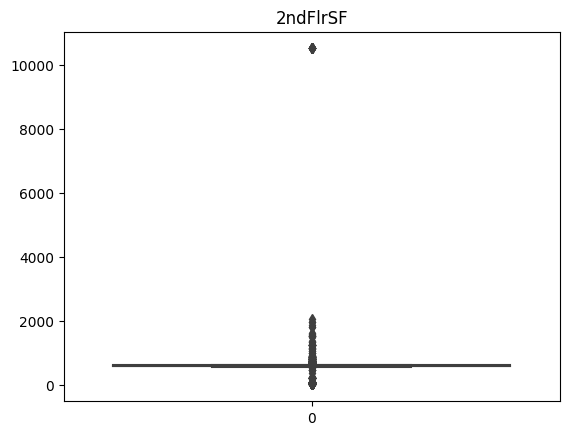

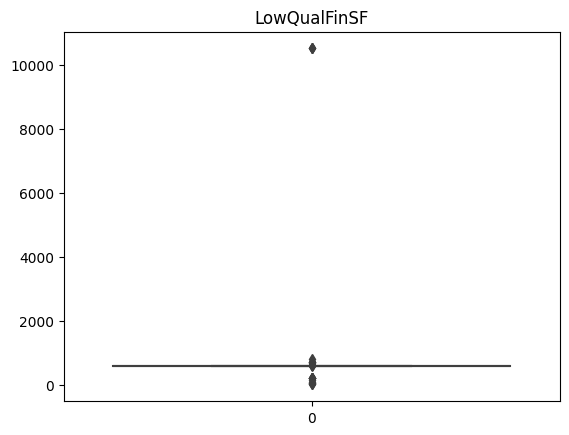

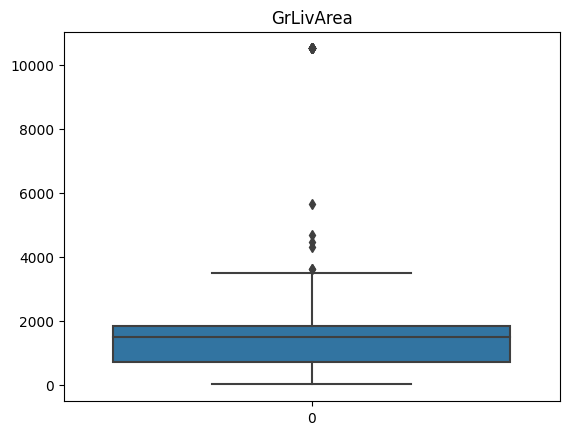

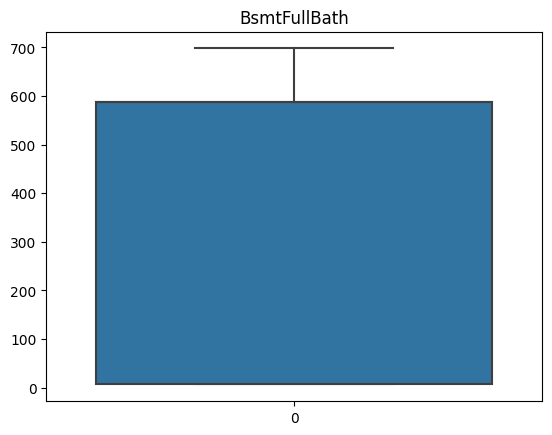

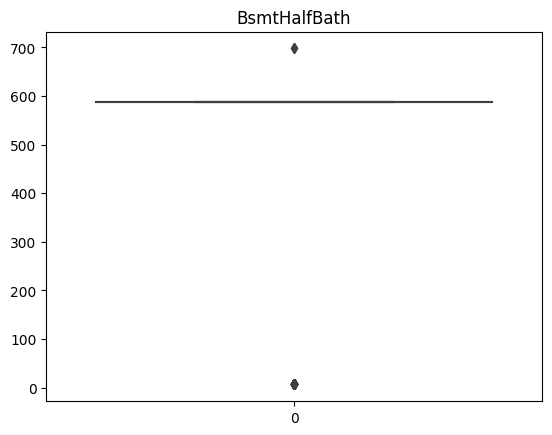

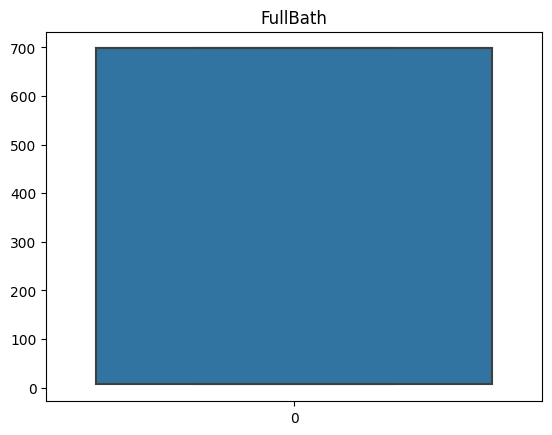

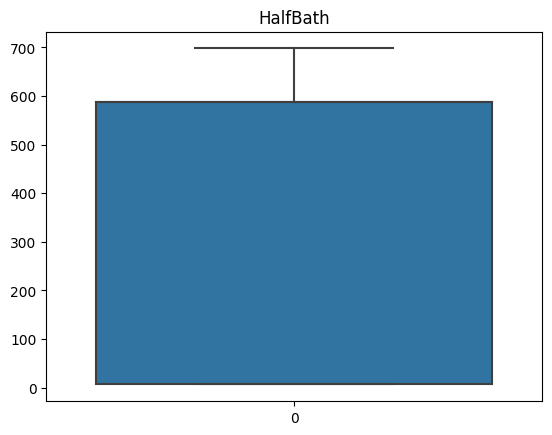

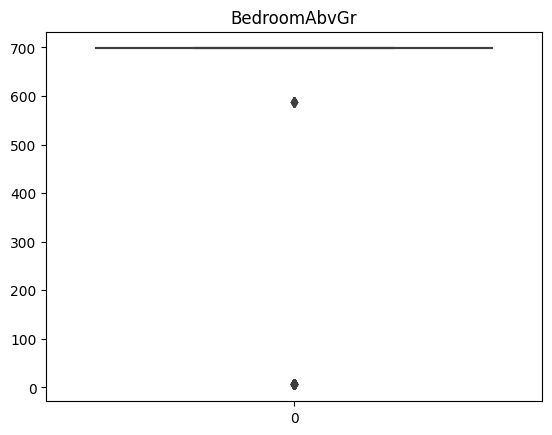

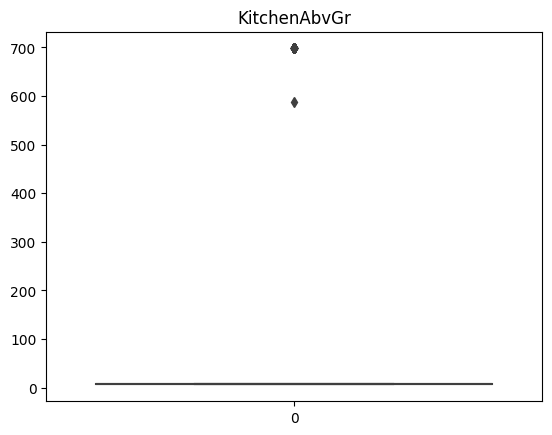

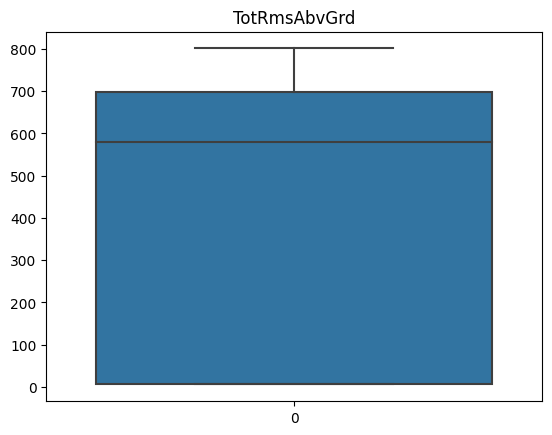

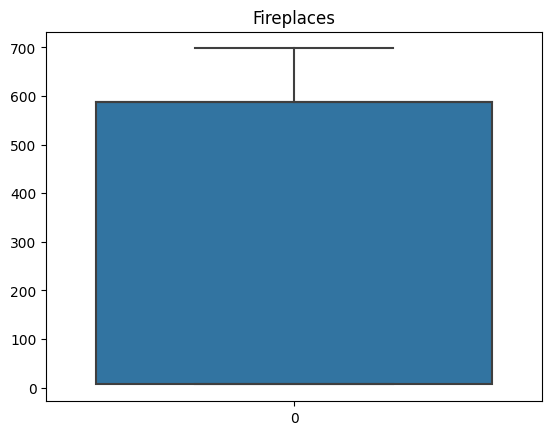

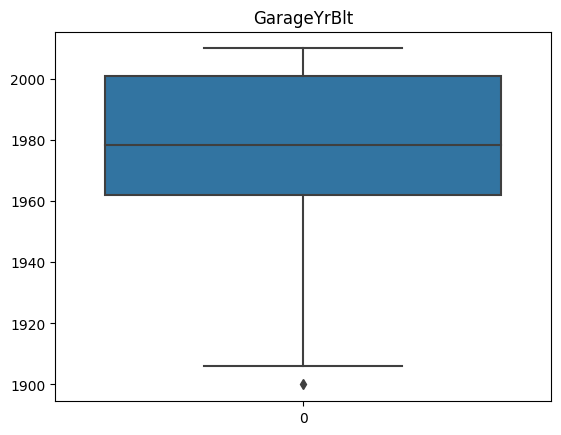

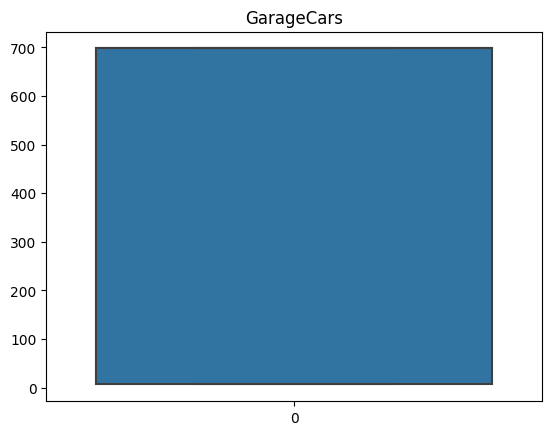

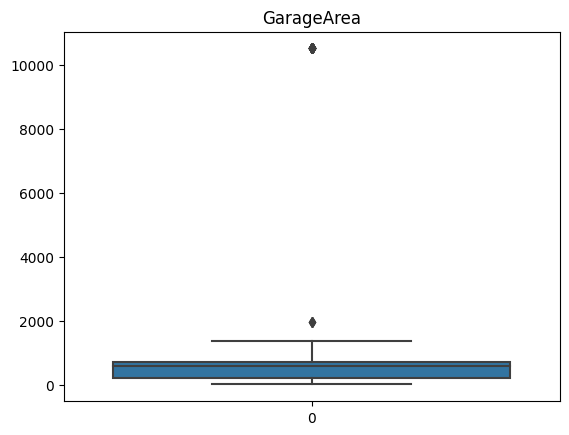

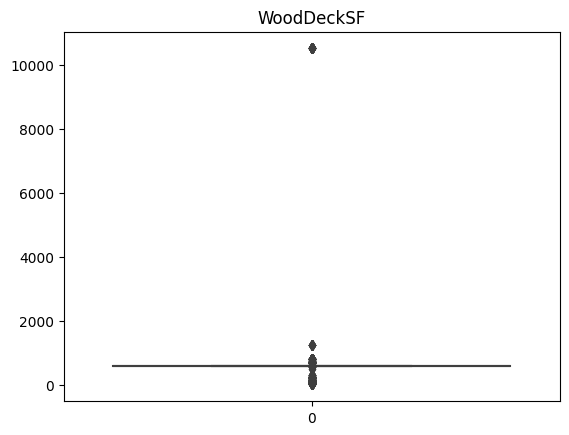

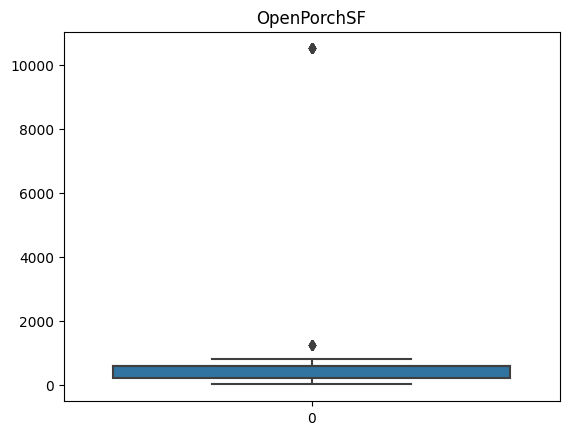

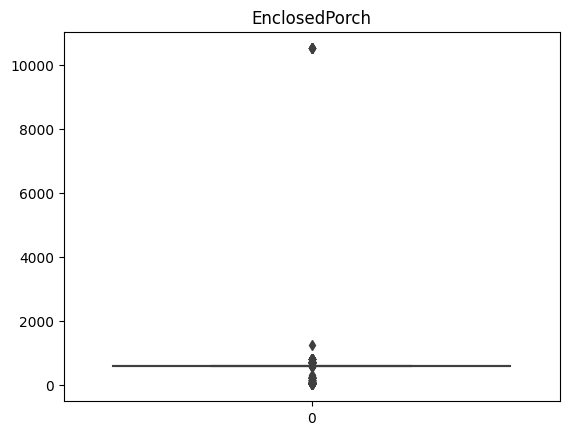

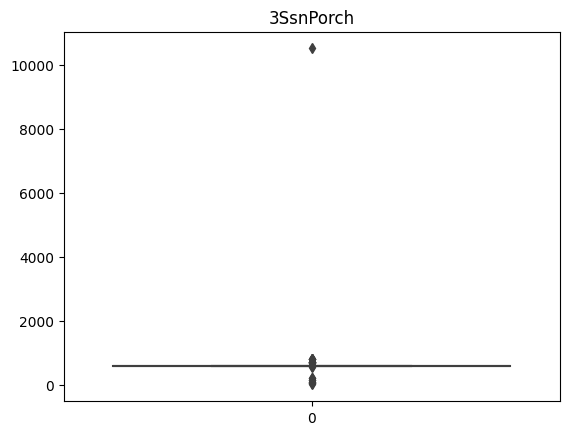

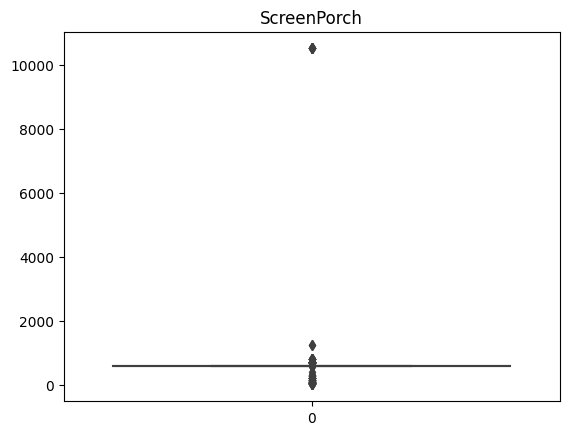

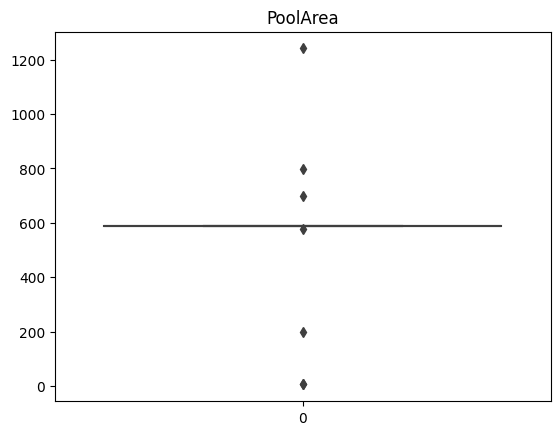

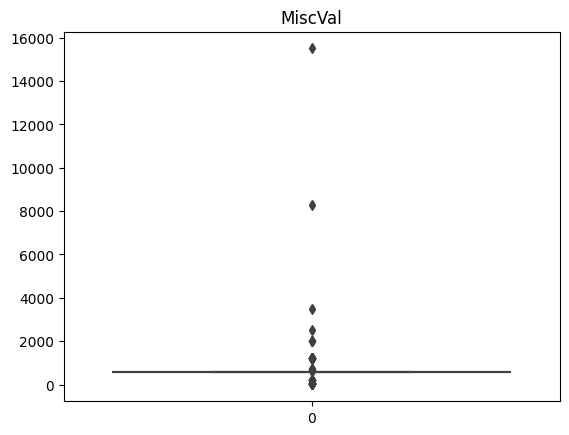

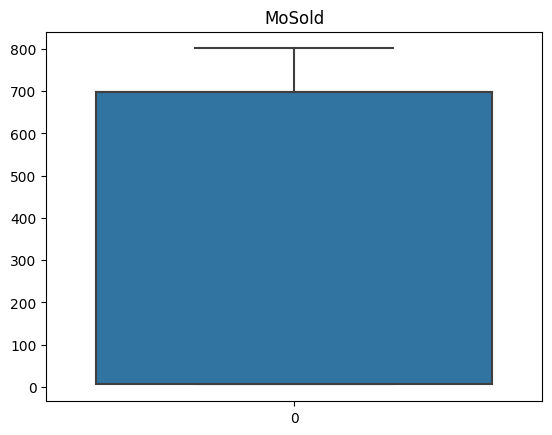

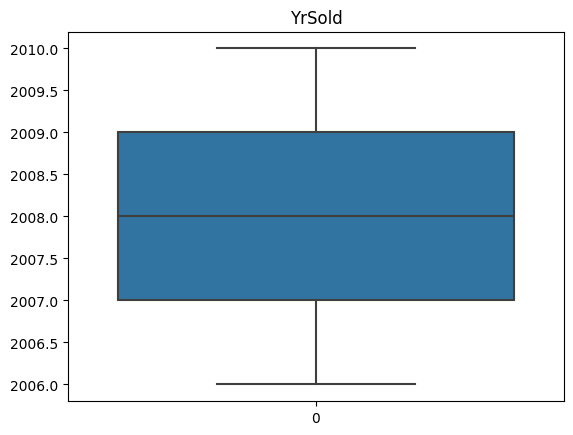

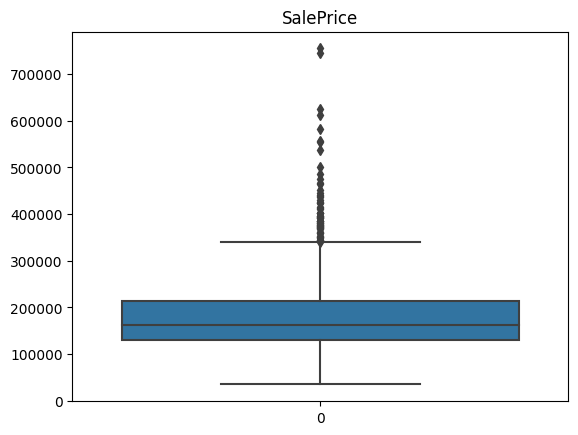

In [230]:
for col in numerical_data:
    sns.boxplot(df_health[col])
    plt.title(col)
    plt.show()

In [231]:
df_health.drop(columns=categorical_data,axis=1,inplace=True)

In [232]:
df_health.corr()['SalePrice']

Id                       -0.015600
MSSubClass                0.037984
LotFrontage               0.005087
LotArea                   0.263863
OverallQual              -0.014585
                            ...   
PoolQC_encoding          -0.038416
Fence_encoding            0.100202
MiscFeature_encoding      0.040790
SaleType_encoding        -0.347501
SaleCondition_encoding    0.112833
Name: SalePrice, Length: 81, dtype: float64

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [234]:
from sklearn.metrics import r2_score,accuracy_score


In [235]:
from xgboost import XGBRegressor

In [236]:
xgb_model=XGBRegressor(learning_rate=0.005,n_estimators=10000)

In [237]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [238]:
y_pred=xgb_model.predict(X_train)
print(r2_score(y_train,y_pred))

0.9998893843367028


In [239]:
y_pred=xgb_model.predict(X_test)
print(r2_score(y_test,y_pred))

0.9036611507300456


So we got the model which is giving us about 79 percent acuracy


In [251]:
#feature selecion with Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
X=df_health.drop(columns='SalePrice',axis=1)
y=df_health['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
params={'alpha':[0.0001,0.0005,0.001,0.01,0.1]}
lasso=Lasso()
cv=GridSearchCV(lasso,param_grid=params)
cv.fit(X_train,y_train)



GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.1]})

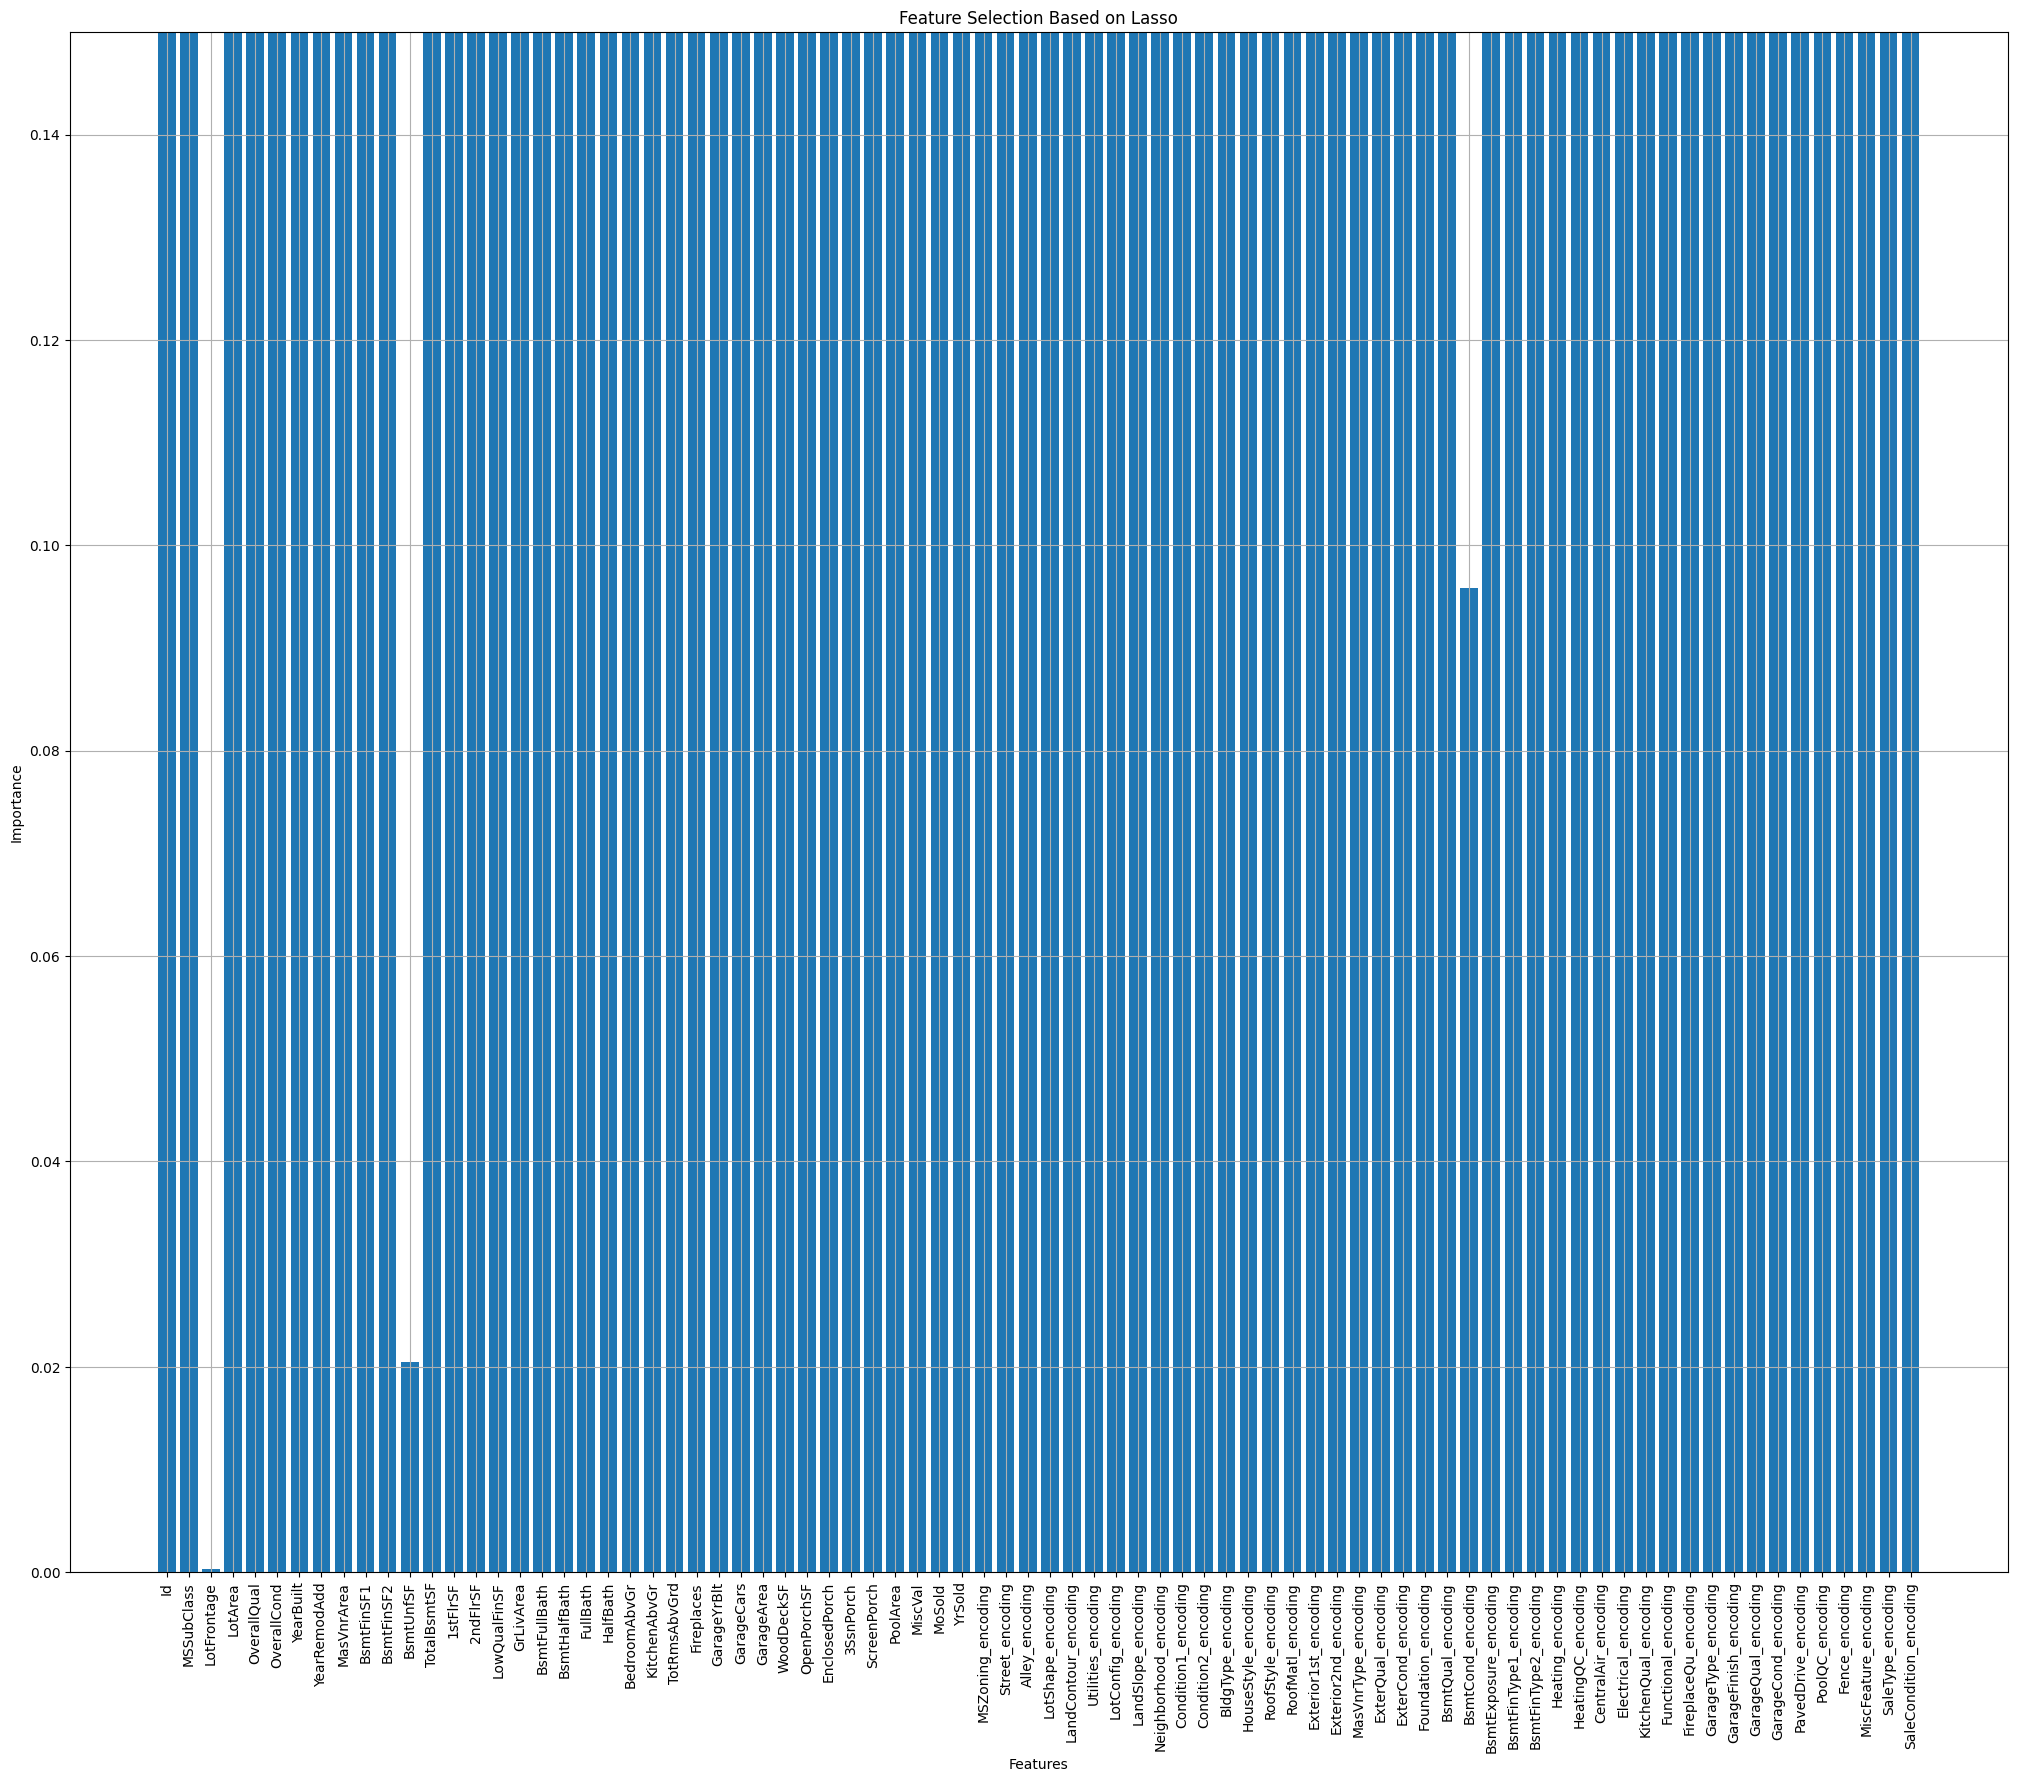

In [252]:
lasso1=Lasso(alpha=0.1)
lasso1.fit(X_train,y_train)
col=X_train.columns
lasso1_coef=np.abs(lasso1.coef_)
plt.figure(figsize=(25,20))
plt.bar(col,lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()


In [253]:
arr_check=zip(X_train.columns,lasso1_coef)

In [254]:
needed_columns=np.array(col)[lasso1_coef>2]

In [255]:
X=df_health[needed_columns]
y=df_health['SalePrice']


In [256]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=10000,learning_rate=0.001)
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [246]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
categorical_data=[]
numerical_data=[]
for col in df_test.columns:
    if df_test[col].dtype=='O':
        categorical_data.append(col)
    else:
        numerical_data.append(col)

le=LabelEncoder()
for col in categorical_data:
    arr=le.fit_transform(df_test[col])
    df_test[col+'_encoding']=arr


In [257]:
y_pred=xgb.predict(df_test[needed_columns])

In [261]:
df_test['SalePrice']=y_pred


1459

In [264]:
filename='submission.csv'
df_test[['Id','SalePrice']].to_csv(filename,index=None)
print("The output file is submission.csv")



The output file is submission.csv
